In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')
from custom_distribution import MagnitudeDistribution

In [65]:
bands = ["g", "r"]
n_per_class_per_field = 5000
n_std_limmag = 0.7  # How deep you want to sample the magnitudes

magnitude_upper_limit = 10
#magnitude_lower_limit = {"RRLyrae": 22.7, "M33Cepheids": 23.5}
magnitude_lower_limit = {}
standard_erf_limit = {"g": 20.5, "r": 20-0.5, "i": 22.8-1.15}
custom_erf_limit = {"RRLyrae": {"g": 21.5}}

shift_limit = -2
extrapolation_limits = {"g": [magnitude_upper_limit, 25.322089154033994 + shift_limit], # 25.602089154033994
                        "r": [magnitude_upper_limit, 25.029324900291915 + shift_limit],
                        "i": [magnitude_upper_limit, 24.45150161567846 + shift_limit],
                        "z": [magnitude_upper_limit, 23.122699702058064 + shift_limit]}

mag_distr = MagnitudeDistribution(erf_limit=standard_erf_limit,
                                  bands=bands,
                                  load_distr=True,
                                  extrapolation_limit=extrapolation_limits)

In [66]:
n_samples = 10000
samples = mag_distr.sample(n_samples)

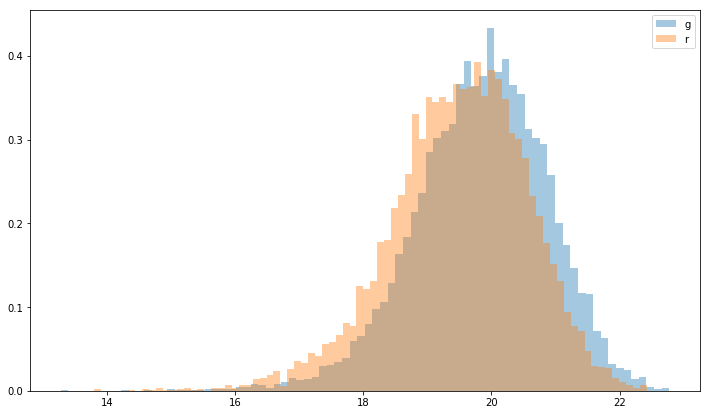

In [67]:
samples.keys()
plt.figure(figsize=(12,7))
for band in samples.keys():
    plt.hist(samples[band], bins=80, label=band, alpha=0.4, density=True)
plt.legend()
plt.show()

# Sampling from templates

In [73]:
#typeI = np.load("../../../supernovae_templates/Hsiao_custom_2000_lc.pkl")
typeI = np.load("../../../supernovae_templates/moriya_custom_2000_lc.pkl")
obs_days = np.load("../../../supernovae_templates/days_templates.pkl")

In [126]:
type(typeI["custom_field"])
typeI["custom_field"][0]

real_days = {"g":[], "r":[], "i":[]}

for i, band in enumerate(["g", "r", "i"]):
    real_days[band] = 50000 + np.arange(i, 50, step=6)

In [127]:
def interpolate_template(template, template_days, real_days, band_to_match = "g"):
    from_zero = template_days[band_to_match] - np.amin(template_days[band_to_match])
    print("from_zero", np.amin(from_zero), np.amax(from_zero))
    min_mag = np.amin(template[band_to_match])
    slope = np.diff(template[band_to_match])
    #min_mjd = from_zero[np.argmin(template[band_to_match])]
    min_mjd = from_zero[np.argmin(slope)]
    print("min_mjd", min_mjd)
    print("real_days", real_days["g"])
    max_in_real_days = np.random.uniform(np.amin(real_days[band_to_match]), np.amax(real_days[band_to_match]))
    print("max_real_days", max_in_real_days)
    samples = {}
    for band in ["g", "r", "i"]:
        days_to_interpolate = real_days[band] - max_in_real_days + min_mjd
        print("BAND_INTERX", days_to_interpolate)
        from_zero = template_days[band] - np.amin(template_days[band])
        samples[band] = np.interp(days_to_interpolate, from_zero, template[band])
    return samples

No handles with labels found to put in legend.


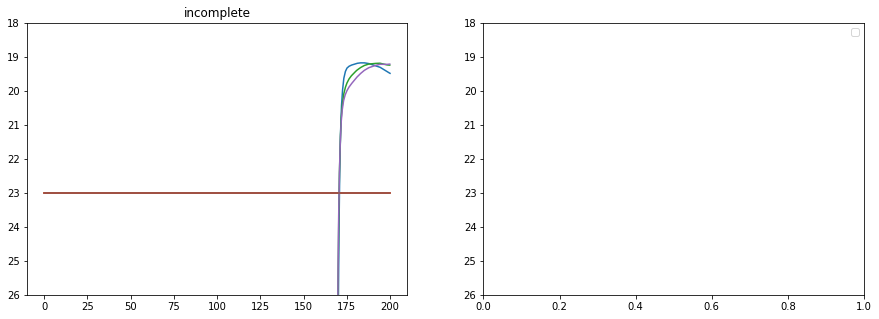

No handles with labels found to put in legend.


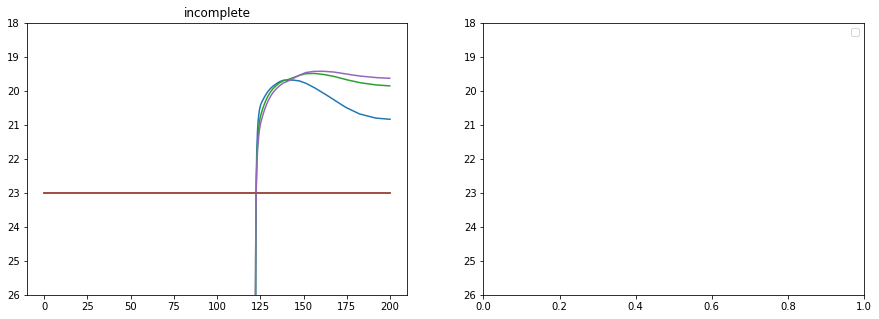

from_zero 0.0 199.95000001163862
min_mjd 0.9000000000523869
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50036.58814076583
BAND_INTERX [-35.68814077 -29.68814077 -23.68814077 -17.68814077 -11.68814077
  -5.68814077   0.31185923   6.31185923  12.31185923]
BAND_INTERX [-34.68814077 -28.68814077 -22.68814077 -16.68814077 -10.68814077
  -4.68814077   1.31185923   7.31185923  13.31185923]
BAND_INTERX [-33.68814077 -27.68814077 -21.68814077 -15.68814077  -9.68814077
  -3.68814077   2.31185923   8.31185923]
{'g': array([38.49513989, 38.49513989, 38.49513989, 38.49513989, 38.49513989,
       38.49513989, 37.54061038, 22.18218081, 21.94276113]), 'r': array([35.34535416, 35.34535416, 35.34535416, 35.34535416, 35.34535416,
       35.34535416, 28.59808169, 22.39779384, 22.1020789 ]), 'i': array([33.85732301, 33.85732301, 33.85732301, 33.85732301, 33.85732301,
       33.85732301, 25.14822423, 22.28565354])}


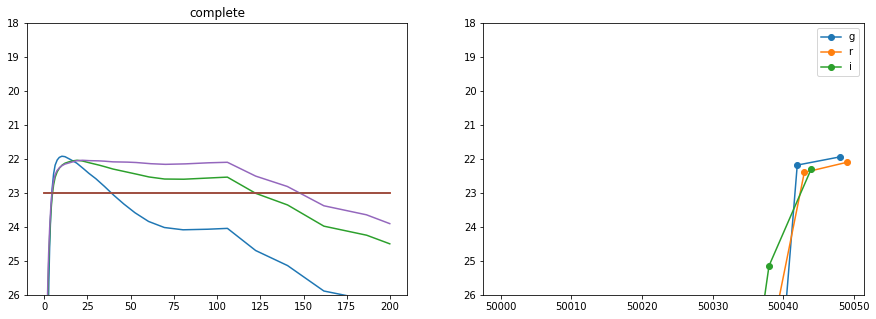

from_zero 0.0 199.95000001163862
min_mjd 111.45000000648724
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50004.49307104683
BAND_INTERX [106.95692896 112.95692896 118.95692896 124.95692896 130.95692896
 136.95692896 142.95692896 148.95692896 154.95692896]
BAND_INTERX [107.95692896 113.95692896 119.95692896 125.95692896 131.95692896
 137.95692896 143.95692896 149.95692896 155.95692896]
BAND_INTERX [108.95692896 114.95692896 120.95692896 126.95692896 132.95692896
 138.95692896 144.95692896 150.95692896]
{'g': array([29.10830232, 23.71983924, 22.83588676, 22.46692413, 22.38724055,
       22.51958071, 22.76789625, 23.04572692, 23.32753088]), 'r': array([28.49313981, 23.61831197, 22.9272064 , 22.50184815, 22.27812342,
       22.18016751, 22.18684634, 22.25321859, 22.34247612]), 'i': array([28.34303125, 23.59261942, 22.92792427, 22.52116214, 22.27313199,
       22.13802215, 22.09162827, 22.10110896])}


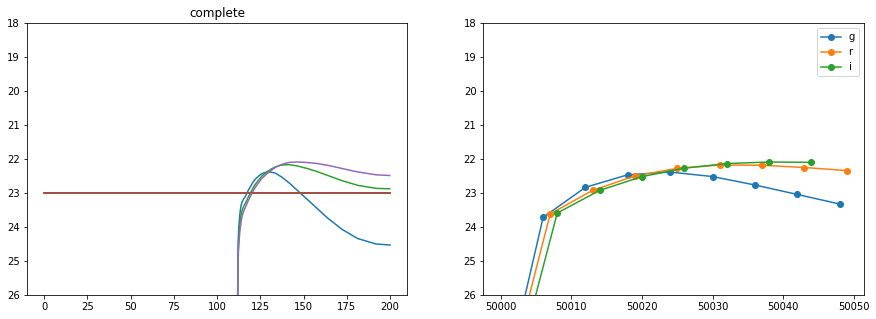

No handles with labels found to put in legend.


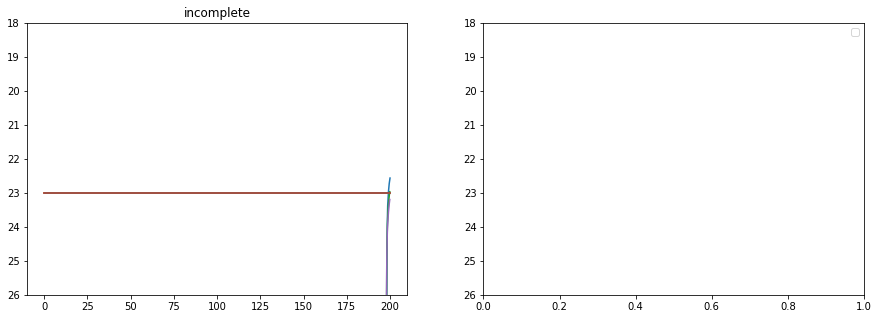

from_zero 0.0 199.95000001163862
min_mjd 145.05000000844302
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50031.39843933794
BAND_INTERX [113.65156067 119.65156067 125.65156067 131.65156067 137.65156067
 143.65156067 149.65156067 155.65156067 161.65156067]
BAND_INTERX [114.65156067 120.65156067 126.65156067 132.65156067 138.65156067
 144.65156067 150.65156067 156.65156067 162.65156067]
BAND_INTERX [115.65156067 121.65156067 127.65156067 133.65156067 139.65156067
 145.65156067 151.65156067 157.65156067]
{'g': array([32.42876781, 32.42876781, 32.42876781, 32.42876781, 32.42876781,
       36.54371408, 24.36861829, 23.99518902, 23.81490001]), 'r': array([31.55207687, 31.55207687, 31.55207687, 31.55207687, 31.55207687,
       33.82583632, 24.31021198, 23.86560486, 23.60682022]), 'i': array([31.13497998, 31.13497998, 31.13497998, 31.13497998, 31.13497998,
       25.75071572, 24.24246011, 23.79404885])}


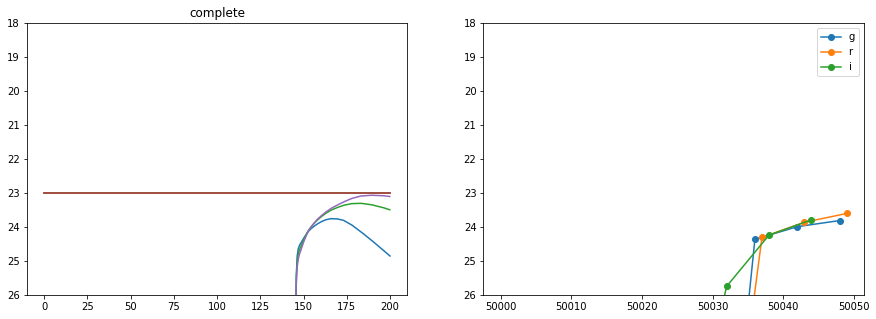

No handles with labels found to put in legend.


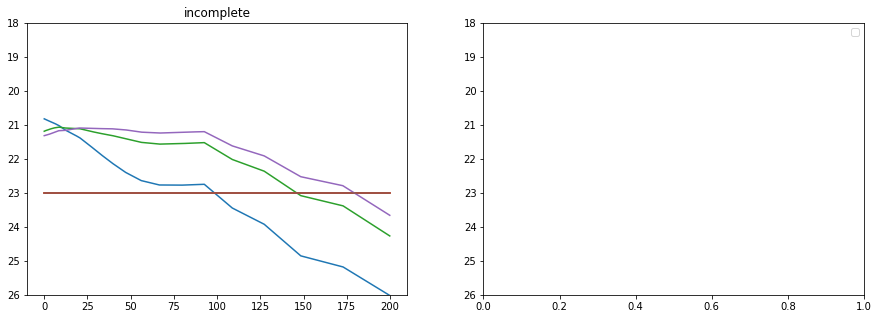

from_zero 0.0 199.95000001163862
min_mjd 170.10000000990112
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50026.92912966896
BAND_INTERX [143.17087034 149.17087034 155.17087034 161.17087034 167.17087034
 173.17087034 179.17087034 185.17087034 191.17087034]
BAND_INTERX [144.17087034 150.17087034 156.17087034 162.17087034 168.17087034
 174.17087034 180.17087034 186.17087034 192.17087034]
BAND_INTERX [145.17087034 151.17087034 157.17087034 163.17087034 169.17087034
 175.17087034 181.17087034 187.17087034]
{'g': array([37.23993975, 37.23993975, 37.23993975, 37.23993975, 37.23993975,
       23.17482832, 22.809803  , 22.76667516, 22.8701891 ]), 'r': array([35.19236385, 35.19236385, 35.19236385, 35.19236385, 35.19236385,
       23.18019079, 22.72954643, 22.5663506 , 22.55839823]), 'i': array([34.3414826 , 34.3414826 , 34.3414826 , 34.3414826 , 34.96040372,
       23.14094528, 22.68528451, 22.5148738 ])}


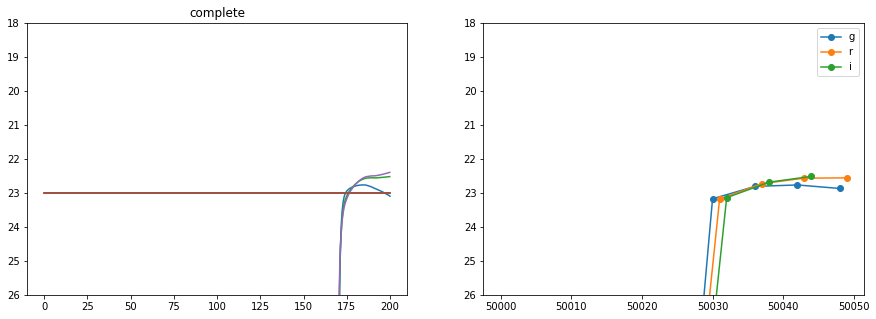

from_zero 0.0 199.95000001163862
min_mjd 15.450000000899308
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50017.383988282854
BAND_INTERX [-1.93398828  4.06601172 10.06601172 16.06601172 22.06601172 28.06601172
 34.06601172 40.06601172 46.06601172]
BAND_INTERX [-0.93398828  5.06601172 11.06601172 17.06601172 23.06601172 29.06601172
 35.06601172 41.06601172 47.06601172]
BAND_INTERX [ 0.06601172  6.06601172 12.06601172 18.06601172 24.06601172 30.06601172
 36.06601172 42.06601172]
{'g': array([30.34767886, 30.34767886, 30.34767886, 24.73333719, 22.52003686,
       22.24906408, 22.11150638, 22.14397595, 22.26632463]), 'r': array([29.30448849, 29.30448849, 29.30448849, 23.63121759, 22.61520581,
       22.26035712, 22.06811502, 21.99470652, 21.9229974 ]), 'i': array([28.93850891, 28.93850891, 28.93850891, 23.48920638, 22.65127669,
       22.28963554, 22.10409658, 21.99862215])}


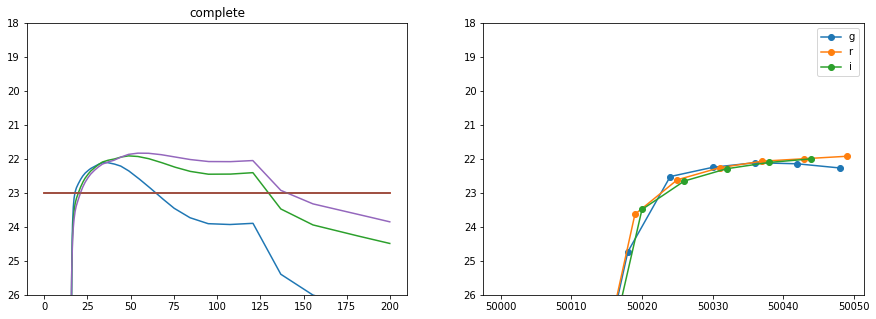

from_zero 0.0 199.95000001163862
min_mjd 97.05000000564905
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50013.676865424415
BAND_INTERX [ 83.37313458  89.37313458  95.37313458 101.37313458 107.37313458
 113.37313458 119.37313458 125.37313458 131.37313458]
BAND_INTERX [ 84.37313458  90.37313458  96.37313458 102.37313458 108.37313458
 114.37313458 120.37313458 126.37313458 132.37313458]
BAND_INTERX [ 85.37313458  91.37313458  97.37313458 103.37313458 109.37313458
 115.37313458 121.37313458 127.37313458]
{'g': array([35.81092082, 35.81092082, 35.81092082, 22.06307755, 21.64066653,
       21.46620851, 21.46892876, 21.59349501, 21.78719864]), 'r': array([33.93286942, 33.93286942, 34.74472299, 22.14664212, 21.67070598,
       21.43826349, 21.30151504, 21.22717406, 21.2401339 ]), 'i': array([32.74549617, 32.74549617, 25.92091749, 22.15319862, 21.6927097 ,
       21.45748162, 21.2847311 , 21.17914259])}


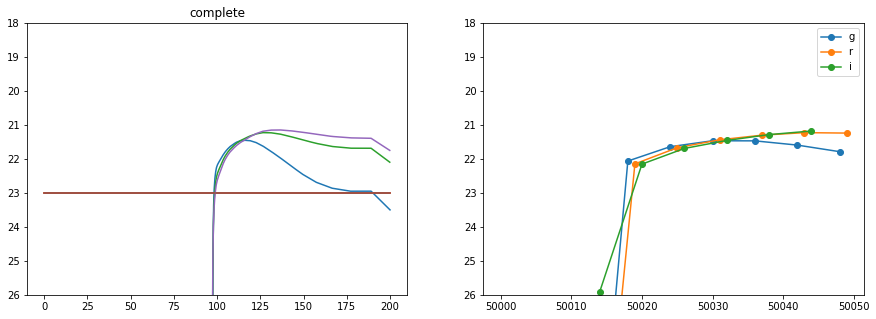

No handles with labels found to put in legend.


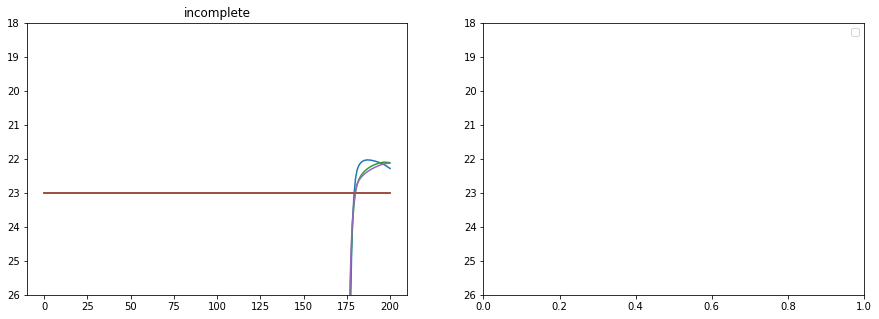

from_zero 0.0 199.95000001163862
min_mjd 59.85000000348373
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50011.924446971745
BAND_INTERX [47.92555303 53.92555303 59.92555303 65.92555303 71.92555303 77.92555303
 83.92555303 89.92555303 95.92555303]
BAND_INTERX [48.92555303 54.92555303 60.92555303 66.92555303 72.92555303 78.92555303
 84.92555303 90.92555303 96.92555303]
BAND_INTERX [49.92555303 55.92555303 61.92555303 67.92555303 73.92555303 79.92555303
 85.92555303 91.92555303]
{'g': array([33.29591358, 33.29591358, 33.85515414, 21.99911329, 21.65490205,
       21.51046355, 21.5188501 , 21.59904407, 21.76920883]), 'r': array([31.63981058, 31.63981058, 23.76997723, 21.93723755, 21.51298101,
       21.33422845, 21.25979405, 21.17320365, 21.1651099 ]), 'i': array([30.60520327, 30.60520327, 23.00295648, 21.89415702, 21.46889414,
       21.29611107, 21.17591341, 21.05178719])}


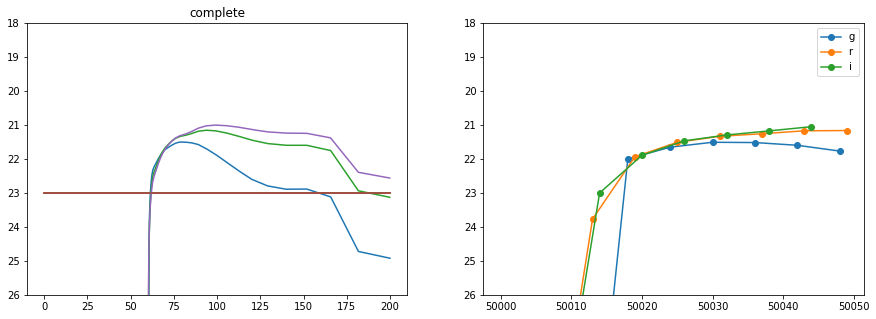

from_zero 0.0 199.95000001163862
min_mjd 97.05000000564905
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50046.29867188597
BAND_INTERX [50.75132812 56.75132812 62.75132812 68.75132812 74.75132812 80.75132812
 86.75132812 92.75132812 98.75132812]
BAND_INTERX [51.75132812 57.75132812 63.75132812 69.75132812 75.75132812 81.75132812
 87.75132812 93.75132812 99.75132812]
BAND_INTERX [52.75132812 58.75132812 64.75132812 70.75132812 76.75132812 82.75132812
 88.75132812 94.75132812]
{'g': array([36.13667878, 36.13667878, 36.13667878, 36.13667878, 36.13667878,
       36.13667878, 36.13667878, 36.13667878, 23.1018803 ]), 'r': array([34.11661989, 34.11661989, 34.11661989, 34.11661989, 34.11661989,
       34.11661989, 34.11661989, 34.11661989, 22.71944533]), 'i': array([32.90912902, 32.90912902, 32.90912902, 32.90912902, 32.90912902,
       32.90912902, 32.90912902, 32.90912902])}


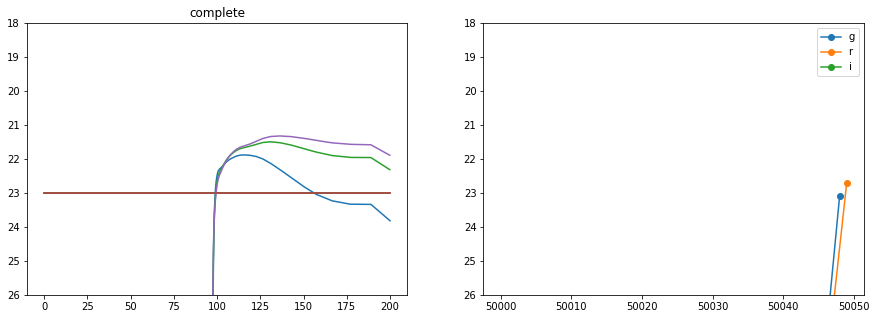

from_zero 0.0 199.95000001163862
min_mjd 123.00000000715954
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50013.83748670902
BAND_INTERX [109.1625133 115.1625133 121.1625133 127.1625133 133.1625133 139.1625133
 145.1625133 151.1625133 157.1625133]
BAND_INTERX [110.1625133 116.1625133 122.1625133 128.1625133 134.1625133 140.1625133
 146.1625133 152.1625133 158.1625133]
BAND_INTERX [111.1625133 117.1625133 123.1625133 129.1625133 135.1625133 141.1625133
 147.1625133 153.1625133]
{'g': array([29.70652584, 29.70652584, 29.70652584, 23.07484326, 22.7527837 ,
       22.56450895, 22.58957872, 22.71558232, 22.94258465]), 'r': array([28.81541702, 28.81541702, 31.3855643 , 23.24671416, 22.8204291 ,
       22.5446692 , 22.44631567, 22.36485791, 22.36119259]), 'i': array([28.56726831, 28.56726831, 26.72942546, 23.27812245, 22.85175595,
       22.57072143, 22.46154367, 22.33016545])}


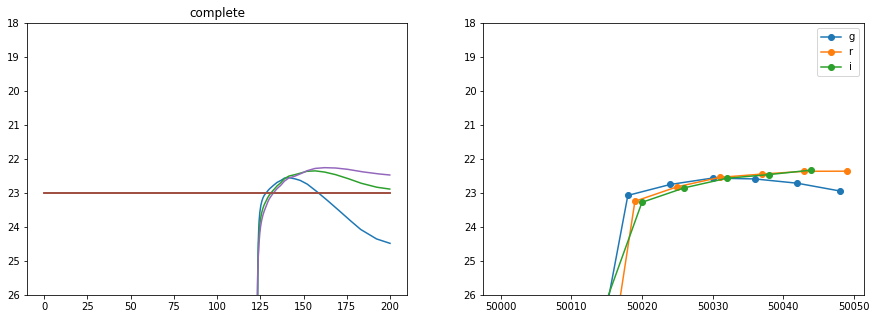

from_zero 0.0 199.95000001163862
min_mjd 45.45000000264554
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50034.39169250593
BAND_INTERX [11.0583075 17.0583075 23.0583075 29.0583075 35.0583075 41.0583075
 47.0583075 53.0583075 59.0583075]
BAND_INTERX [12.0583075 18.0583075 24.0583075 30.0583075 36.0583075 42.0583075
 48.0583075 54.0583075 60.0583075]
BAND_INTERX [13.0583075 19.0583075 25.0583075 31.0583075 37.0583075 43.0583075
 49.0583075 55.0583075]
{'g': array([35.90940782, 35.90940782, 35.90940782, 35.90940782, 35.90940782,
       35.90940782, 23.07586667, 22.31238275, 22.0143763 ]), 'r': array([34.34485653, 34.34485653, 34.34485653, 34.34485653, 34.34485653,
       34.34485653, 23.06410715, 22.37086141, 22.04188257]), 'i': array([33.29615925, 33.29615925, 33.29615925, 33.29615925, 33.29615925,
       33.29615925, 23.08979135, 22.38454234])}


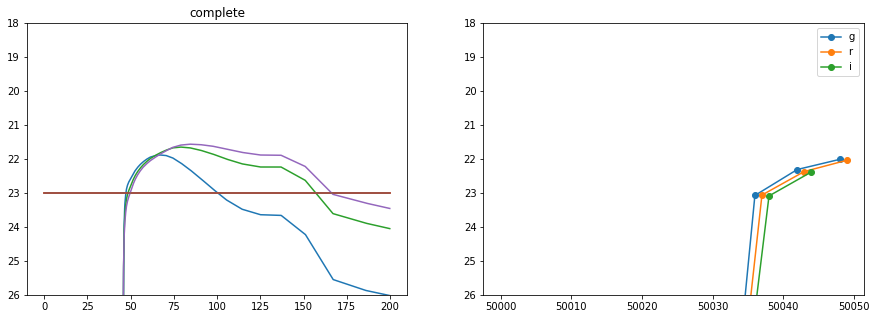

No handles with labels found to put in legend.


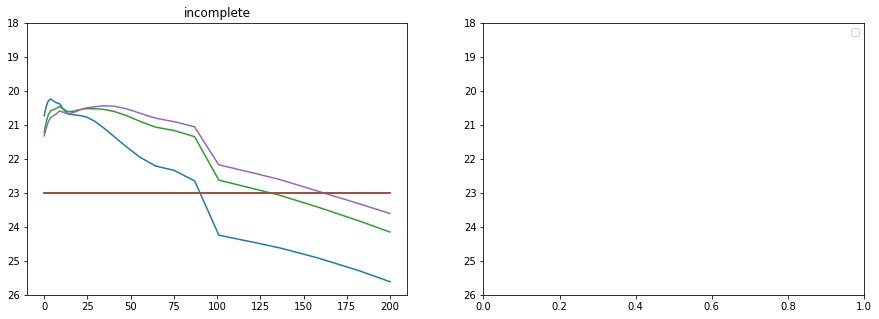

from_zero 0.0 199.95000001163862
min_mjd 65.55000000381551
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50039.34450381012
BAND_INTERX [26.20549619 32.20549619 38.20549619 44.20549619 50.20549619 56.20549619
 62.20549619 68.20549619 74.20549619]
BAND_INTERX [27.20549619 33.20549619 39.20549619 45.20549619 51.20549619 57.20549619
 63.20549619 69.20549619 75.20549619]
BAND_INTERX [28.20549619 34.20549619 40.20549619 46.20549619 52.20549619 58.20549619
 64.20549619 70.20549619]
{'g': array([37.76000334, 37.76000334, 37.76000334, 37.76000334, 37.76000334,
       37.76000334, 37.76000334, 23.76156246, 21.72507146]), 'r': array([35.1578988 , 35.1578988 , 35.1578988 , 35.1578988 , 35.1578988 ,
       35.1578988 , 35.1578988 , 23.00846662, 21.93534927]), 'i': array([34.29146117, 34.29146117, 34.29146117, 34.29146117, 34.29146117,
       34.29146117, 34.73384349, 22.73265636])}


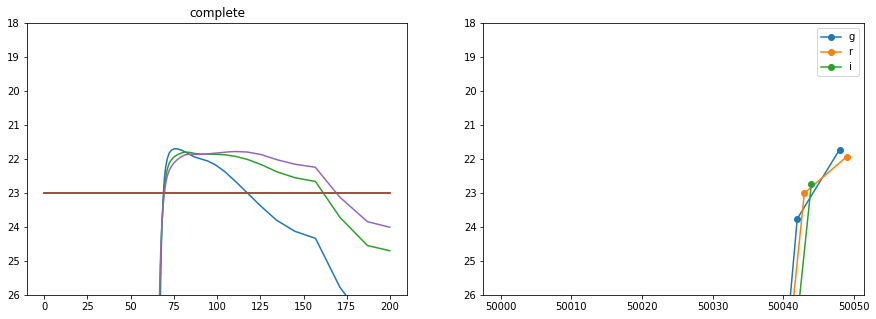

from_zero 0.0 199.95000001163862
min_mjd 39.900000002322486
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50003.563096273785
BAND_INTERX [36.33690373 42.33690373 48.33690373 54.33690373 60.33690373 66.33690373
 72.33690373 78.33690373 84.33690373]
BAND_INTERX [37.33690373 43.33690373 49.33690373 55.33690373 61.33690373 67.33690373
 73.33690373 79.33690373 85.33690373]
BAND_INTERX [38.33690373 44.33690373 50.33690373 56.33690373 62.33690373 68.33690373
 74.33690373 80.33690373]
{'g': array([36.56309375, 26.65891548, 21.57168505, 21.31551523, 21.47977878,
       21.7944113 , 22.09202204, 22.30588252, 22.53837594]), 'r': array([34.008446  , 24.23212872, 21.91587415, 21.7220476 , 21.72773575,
       21.81824162, 21.9030817 , 21.97187388, 22.02987803]), 'i': array([33.77930905, 23.37049957, 21.99167681, 21.88523413, 21.86915177,
       21.90778936, 21.92282106, 21.93006994])}


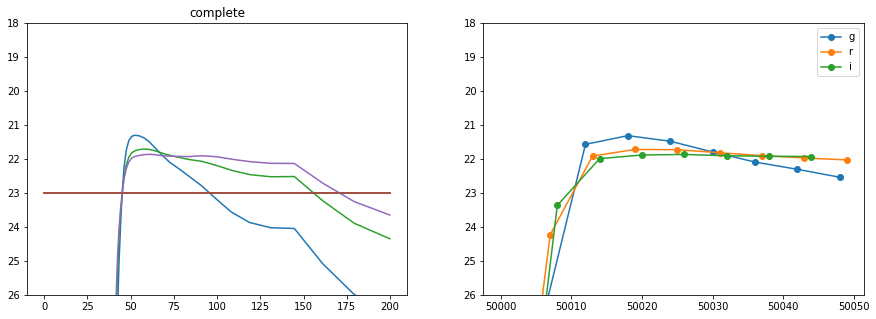

No handles with labels found to put in legend.


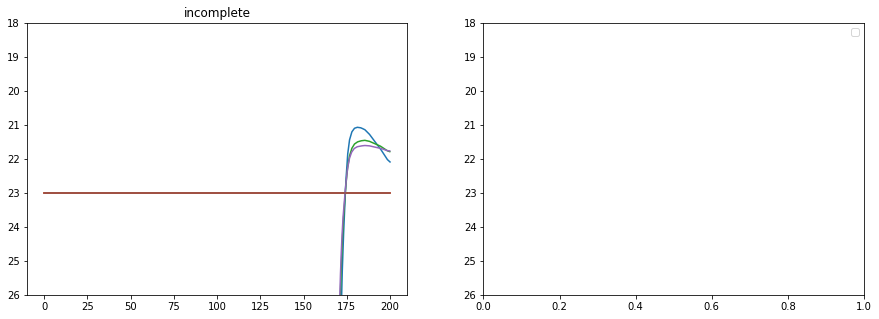

from_zero 0.0 199.95000001163862
min_mjd 72.00000000419095
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50020.485232980755
BAND_INTERX [51.51476702 57.51476702 63.51476702 69.51476702 75.51476702 81.51476702
 87.51476702 93.51476702 99.51476702]
BAND_INTERX [ 52.51476702  58.51476702  64.51476702  70.51476702  76.51476702
  82.51476702  88.51476702  94.51476702 100.51476702]
BAND_INTERX [53.51476702 59.51476702 65.51476702 71.51476702 77.51476702 83.51476702
 89.51476702 95.51476702]
{'g': array([29.21263672, 29.21263672, 29.21263672, 29.21263672, 22.57042049,
       22.13742156, 21.79582504, 21.68880719, 21.75357554]), 'r': array([28.56002599, 28.56002599, 28.56002599, 28.55090353, 22.70197407,
       22.17183614, 21.78766659, 21.60283283, 21.48423187]), 'i': array([28.27660835, 28.27660835, 28.27660835, 32.96874191, 22.7363016 ,
       22.17833608, 21.80488571, 21.60598691])}


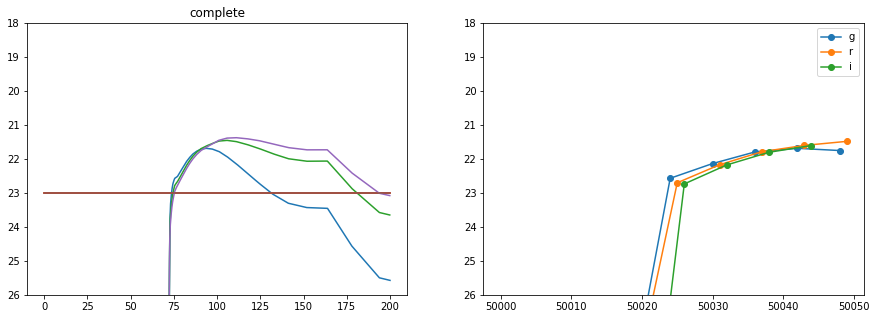

from_zero 0.0 199.95000001163862
min_mjd 199.8000000116299
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50021.83823866527
BAND_INTERX [177.96176135 183.96176135 189.96176135 195.96176135 201.96176135
 207.96176135 213.96176135 219.96176135 225.96176135]
BAND_INTERX [178.96176135 184.96176135 190.96176135 196.96176135 202.96176135
 208.96176135 214.96176135 220.96176135 226.96176135]
BAND_INTERX [179.96176135 185.96176135 191.96176135 197.96176135 203.96176135
 209.96176135 215.96176135 221.96176135]
{'g': array([37.71598909, 37.71598909, 37.71598909, 37.71598909, 38.26723495,
       38.26723495, 38.26723495, 38.26723495, 38.26723495]), 'r': array([35.33823427, 35.33823427, 35.33823427, 35.33823427, 35.90402099,
       35.90402099, 35.90402099, 35.90402099, 35.90402099]), 'i': array([34.49648133, 34.49648133, 34.49648133, 34.49648133, 34.27774541,
       34.27774541, 34.27774541, 34.27774541])}


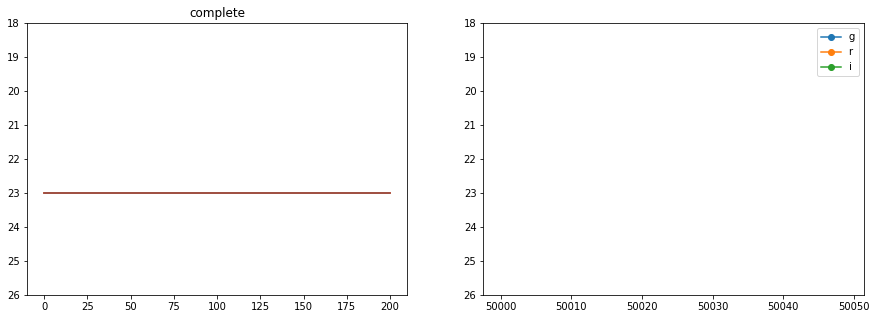

from_zero 0.0 199.95000001163862
min_mjd 121.3500000070635
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50009.16550114579
BAND_INTERX [112.18449886 118.18449886 124.18449886 130.18449886 136.18449886
 142.18449886 148.18449886 154.18449886 160.18449886]
BAND_INTERX [113.18449886 119.18449886 125.18449886 131.18449886 137.18449886
 143.18449886 149.18449886 155.18449886 161.18449886]
BAND_INTERX [114.18449886 120.18449886 126.18449886 132.18449886 138.18449886
 144.18449886 150.18449886 156.18449886]
{'g': array([30.42818139, 30.42818139, 24.07765314, 23.66522846, 23.40086085,
       23.28066389, 23.34435233, 23.50887356, 23.72822353]), 'r': array([29.60307897, 29.75679513, 24.10044268, 23.578731  , 23.24552119,
       23.03178271, 22.93536131, 22.88759466, 22.90297325]), 'i': array([29.23188625, 33.76717111, 24.0685204 , 23.52043837, 23.18894244,
       22.97040708, 22.82787774, 22.72610657])}


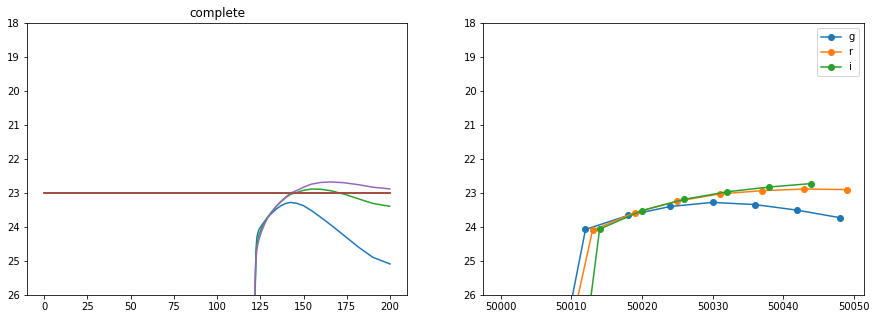

from_zero 0.0 199.95000001163862
min_mjd 51.90000000302098
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50039.203677009114
BAND_INTERX [12.69632299 18.69632299 24.69632299 30.69632299 36.69632299 42.69632299
 48.69632299 54.69632299 60.69632299]
BAND_INTERX [13.69632299 19.69632299 25.69632299 31.69632299 37.69632299 43.69632299
 49.69632299 55.69632299 61.69632299]
BAND_INTERX [14.69632299 20.69632299 26.69632299 32.69632299 38.69632299 44.69632299
 50.69632299 56.69632299]
{'g': array([31.37920041, 31.37920041, 31.37920041, 31.37920041, 31.37920041,
       31.37920041, 31.37920041, 22.81192828, 22.22610118]), 'r': array([30.15413941, 30.15413941, 30.15413941, 30.15413941, 30.15413941,
       30.15413941, 30.15413941, 22.79289262, 22.23979438]), 'i': array([29.778008  , 29.778008  , 29.778008  , 29.778008  , 29.778008  ,
       29.778008  , 29.97069014, 22.76003011])}


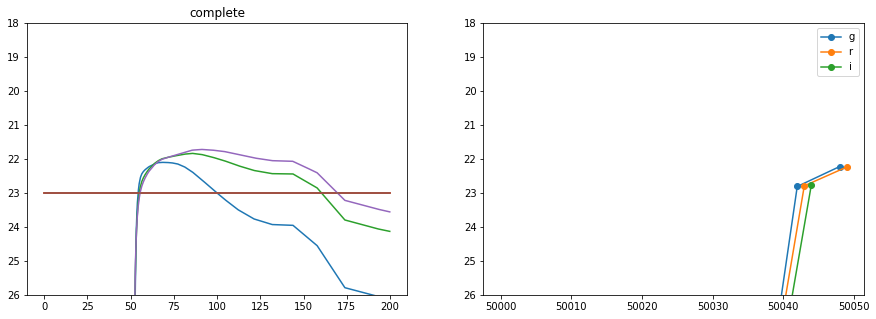

No handles with labels found to put in legend.


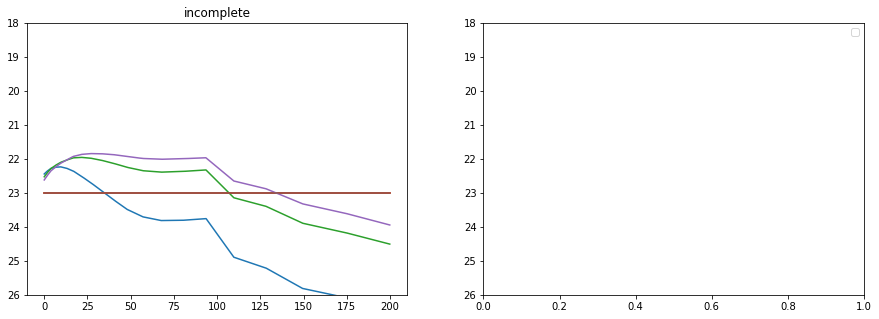

from_zero 0.0 199.95000001163862
min_mjd 61.35000000357104
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50027.71068192429
BAND_INTERX [33.63931808 39.63931808 45.63931808 51.63931808 57.63931808 63.63931808
 69.63931808 75.63931808 81.63931808]
BAND_INTERX [34.63931808 40.63931808 46.63931808 52.63931808 58.63931808 64.63931808
 70.63931808 76.63931808 82.63931808]
BAND_INTERX [35.63931808 41.63931808 47.63931808 53.63931808 59.63931808 65.63931808
 71.63931808 77.63931808]
{'g': array([37.61831618, 37.61831618, 37.61831618, 37.61831618, 37.61831618,
       27.15570307, 22.39316359, 22.21935041, 22.38458881]), 'r': array([34.86551918, 34.86551918, 34.86551918, 34.86551918, 35.03428873,
       24.63582075, 22.58251975, 22.43000842, 22.4058819 ]), 'i': array([33.89175063, 33.89175063, 33.89175063, 33.89175063, 34.8520296 ,
       23.69130343, 22.59142134, 22.48791985])}


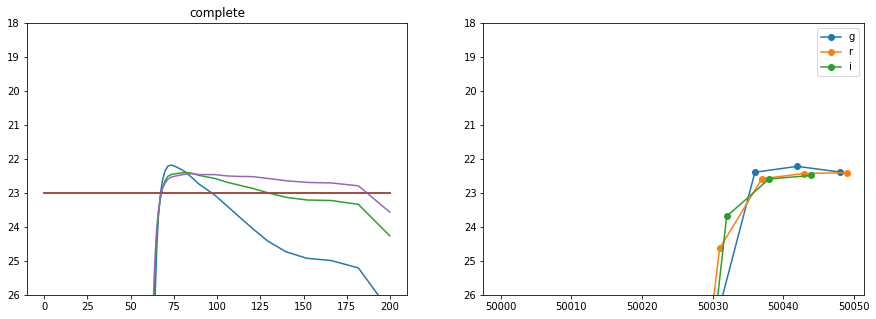

from_zero 0.0 199.95000001163862
min_mjd 71.2500000041473
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50042.38351378388
BAND_INTERX [28.86648622 34.86648622 40.86648622 46.86648622 52.86648622 58.86648622
 64.86648622 70.86648622 76.86648622]
BAND_INTERX [29.86648622 35.86648622 41.86648622 47.86648622 53.86648622 59.86648622
 65.86648622 71.86648622 77.86648622]
BAND_INTERX [30.86648622 36.86648622 42.86648622 48.86648622 54.86648622 60.86648622
 66.86648622 72.86648622]
{'g': array([34.81058225, 34.81058225, 34.81058225, 34.81058225, 34.81058225,
       34.81058225, 34.81058225, 35.57078838, 20.91176934]), 'r': array([32.88500322, 32.88500322, 32.88500322, 32.88500322, 32.88500322,
       32.88500322, 32.88500322, 23.90595736, 21.00530544]), 'i': array([31.16557442, 31.16557442, 31.16557442, 31.16557442, 31.16557442,
       31.16557442, 31.16557442, 22.16724229])}


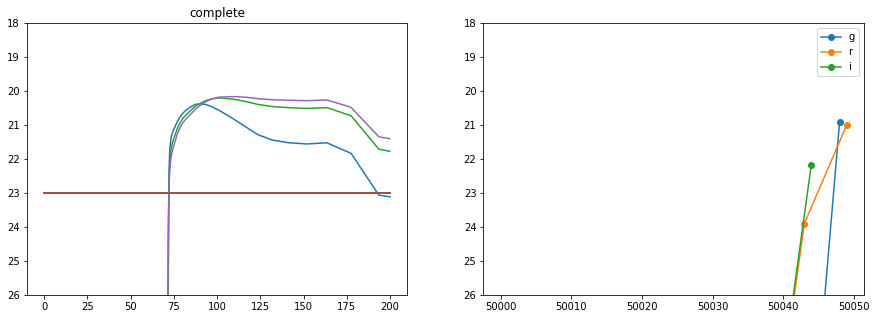

from_zero 0.0 199.95000001163862
min_mjd 67.50000000392902
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50040.57701838386
BAND_INTERX [26.92298162 32.92298162 38.92298162 44.92298162 50.92298162 56.92298162
 62.92298162 68.92298162 74.92298162]
BAND_INTERX [27.92298162 33.92298162 39.92298162 45.92298162 51.92298162 57.92298162
 63.92298162 69.92298162 75.92298162]
BAND_INTERX [28.92298162 34.92298162 40.92298162 46.92298162 52.92298162 58.92298162
 64.92298162 70.92298162]
{'g': array([34.80133998, 34.80133998, 34.80133998, 34.80133998, 34.80133998,
       34.80133998, 34.80133998, 25.04199658, 21.67416744]), 'r': array([32.8405624 , 32.8405624 , 32.8405624 , 32.8405624 , 32.8405624 ,
       32.8405624 , 32.8405624 , 23.48835081, 21.9597394 ]), 'i': array([32.19141614, 32.19141614, 32.19141614, 32.19141614, 32.19141614,
       32.19141614, 32.19141614, 22.86611983])}


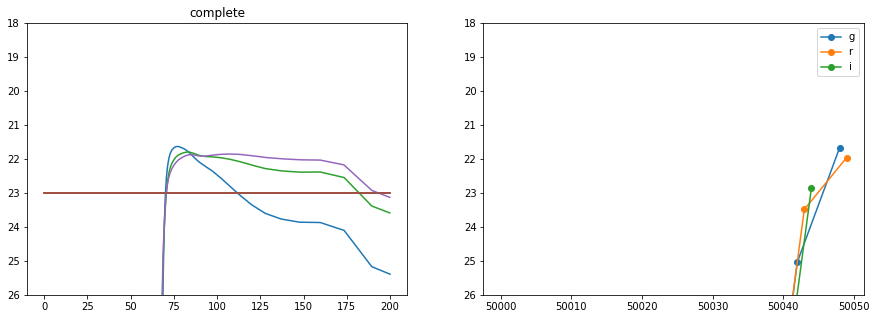

from_zero 0.0 199.95000001163862
min_mjd 8.100000000471482
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50020.77506100151
BAND_INTERX [-12.675061  -6.675061  -0.675061   5.324939  11.324939  17.324939
  23.324939  29.324939  35.324939]
BAND_INTERX [-11.675061  -5.675061   0.324939   6.324939  12.324939  18.324939
  24.324939  30.324939  36.324939]
BAND_INTERX [-10.675061  -4.675061   1.324939   7.324939  13.324939  19.324939
  25.324939  31.324939]
{'g': array([35.97919386, 35.97919386, 35.97919386, 35.97919386, 22.50282503,
       21.94192428, 21.71066405, 21.71000598, 21.88999932]), 'r': array([34.39535153, 34.39535153, 34.39535153, 34.39535153, 22.62206934,
       22.07125217, 21.77273203, 21.58662646, 21.54002893]), 'i': array([33.33634805, 33.33634805, 33.33634805, 33.37859069, 22.65077263,
       22.12499041, 21.82123178, 21.60968271])}


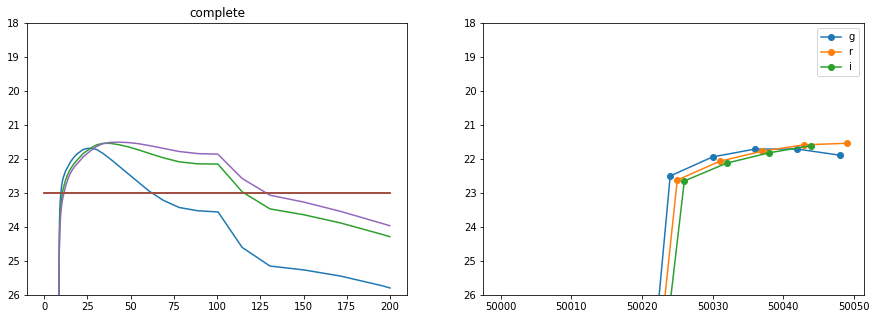

from_zero 0.0 199.95000001163862
min_mjd 24.150000001405715
real_days [50000 50006 50012 50018 50024 50030 50036 50042 50048]
max_real_days 50003.850011473216
BAND_INTERX [20.29998853 26.29998853 32.29998853 38.29998853 44.29998853 50.29998853
 56.29998853 62.29998853 68.29998853]
BAND_INTERX [21.29998853 27.29998853 33.29998853 39.29998853 45.29998853 51.29998853
 57.29998853 63.29998853 69.29998853]
BAND_INTERX [22.29998853 28.29998853 34.29998853 40.29998853 46.29998853 52.29998853
 58.29998853 64.29998853]
{'g': array([29.82482652, 23.32637634, 22.75166933, 22.49728844, 22.49313563,
       22.65424679, 22.91054078, 23.16933614, 23.42943354]), 'r': array([28.97354459, 23.44552025, 22.84612377, 22.52089877, 22.35592232,
       22.2750937 , 22.2937129 , 22.34884382, 22.43112111]), 'i': array([28.71822111, 23.48751852, 22.86229244, 22.55144547, 22.36185791,
       22.23197999, 22.19701709, 22.19675704])}


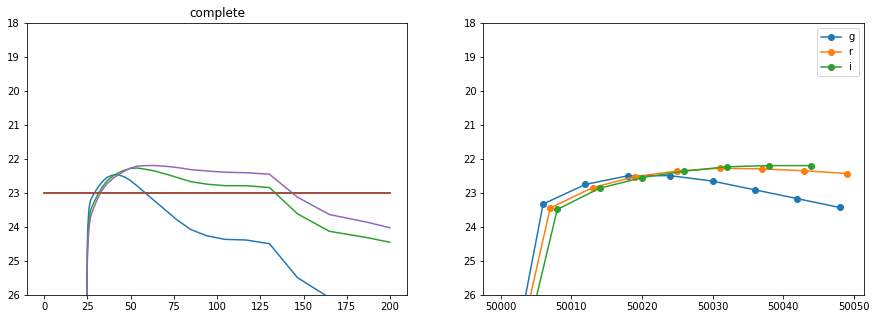

No handles with labels found to put in legend.


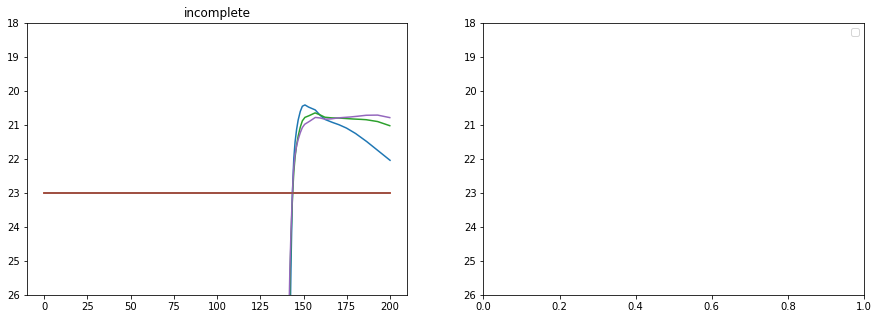

In [128]:
interpolations = []
max_magnitude = 23
for i in range(30):
    f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
    if typeI["custom_field"][i]["g"][0] > max_magnitude and typeI["custom_field"][i]["g"][-1] > max_magnitude:
        mess = "complete"
    else:
        mess = "incomplete"
    for band in ["g","r", "i"]:
        from_zero = obs_days[band]-np.amin(obs_days[band])
        ax1.plot(from_zero, typeI["custom_field"][i][band])
        ax1.plot([0, 200], [max_magnitude, max_magnitude])
    if mess == "complete":
        samples = interpolate_template(typeI["custom_field"][i], obs_days, real_days)
        print(samples)
        for band in ["g", "r", "i"]:
            ax2.plot(real_days[band], samples[band], "-o", label=band)
    ax1.set_ylim([26, 18])
    ax2.set_ylim([26, 18])
    ax2.legend()
    ax1.set_title(mess)
    plt.show()

## Checking EB

In [7]:
eb_data = np.load("eb_templates.pkl")

In [28]:
# Period distribution
print(len(eb_data))
period = []
amplitude = []
for eb in eb_data:
    period.append(eb["Period"])
    g = eb["g"]
    g = g*np.random.uniform(low=1.0, high=1+np.abs(np.amax(g) - np.amin(g))/2.0)
    amplitude.append(np.abs(np.amax(g) - np.amin(g))/2.0)

1375


925


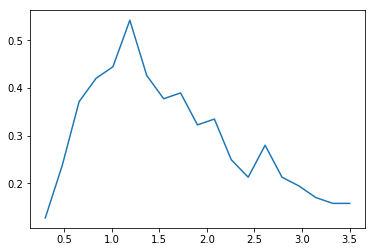

0.030274902653303182 0.685115362408581


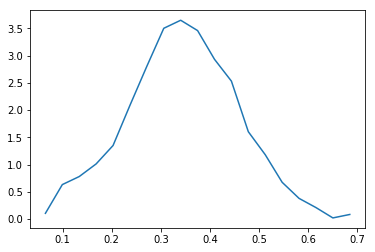

In [29]:
bins = np.linspace(np.amin(period), 3.5, num=20)
print(np.sum(np.array(period) < 3.5))
h, _ = np.histogram(period, bins=bins, density=True)
plt.plot(bins[1:], h)
plt.show()

bins = np.linspace(np.amin(amplitude), np.amax(amplitude), num=20)
print(np.amin(amplitude), np.amax(amplitude))
h, _ = np.histogram(amplitude, bins=bins, density=True)
plt.plot(bins[1:], h)
plt.show()

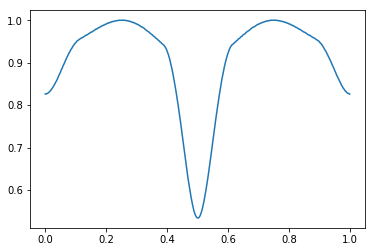

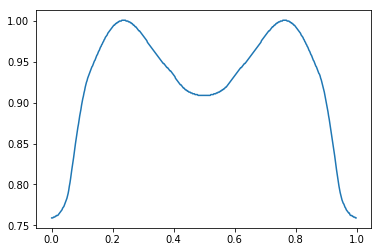

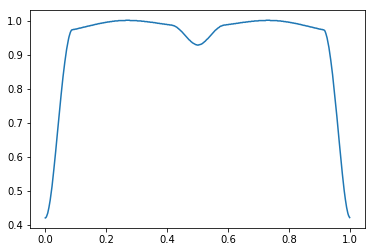

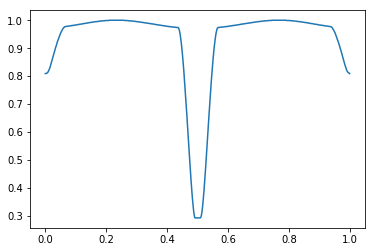

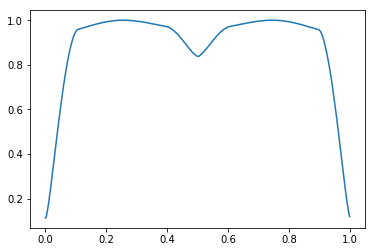

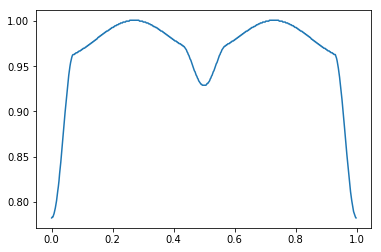

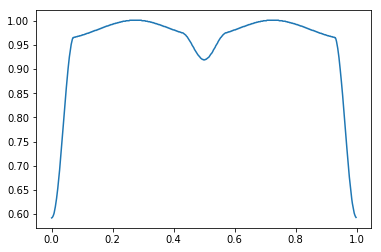

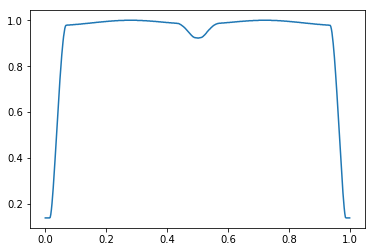

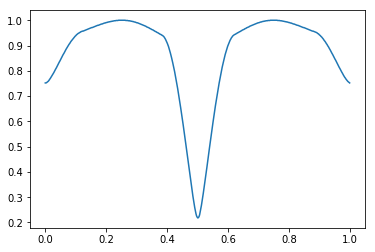

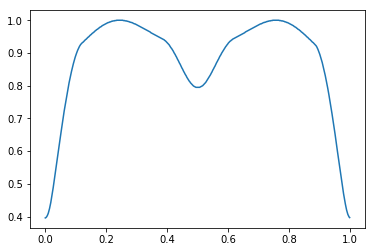

In [16]:
for eb in eb_data[:10]:
    plt.plot(eb["phase"], eb["g"])
    plt.show()

cepheid_distr.py  distr_coef.pkl    RRLYR_HiTS_std.csv
cepheid_gps.pkl   eb_templates.pkl  Untitled.ipynb
